In [ ]:
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



#Dataset Prepare

In [ ]:
from shutil import copyfile
import os
def split_dataset(source, training, testing, validation, split_size):

  file_names = os.listdir(source) 
  file_number = len(file_names) 

  for index, file in enumerate(file_names): 
      if index < split_size * file_number: 
        if index < 0.8 * file_number:
          copyfile(os.path.join(source, file), os.path.join(training, file))
        else:
          copyfile(os.path.join(source, file), os.path.join(validation, file))
      else: 
          copyfile(os.path.join(source, file), os.path.join(testing, file))

In [ ]:
new_folder = "/content/drive/MyDrive/Situs Bersejarah"
new_train_dir = "/content/drive/MyDrive/Situs Bersejarah/train"
new_test_dir = "/content/drive/MyDrive/Situs Bersejarah/test"
new_val_dir = "/content/drive/MyDrive/Situs Bersejarah/validation"

os.mkdir(new_folder)
os.mkdir(new_train_dir)
os.mkdir(new_test_dir)
os.mkdir(new_val_dir)

In [ ]:
source_dataset = "/content/drive/MyDrive/Dataset"
dataset_list = os.listdir(source_dataset)

for data in dataset_list:
  print(data, " : ", str(len(os.listdir(os.path.join(source_dataset, data)))))
  os.mkdir(os.path.join(new_train_dir, data))
  os.mkdir(os.path.join(new_test_dir, data))
  os.mkdir(os.path.join(new_val_dir, data))

In [ ]:
split_size = .9

for dt in dataset_list:
  split_dataset(os.path.join(source_dataset, dt), os.path.join(new_train_dir, dt), os.path.join(new_test_dir, dt), os.path.join(new_val_dir, dt), split_size)

#Build A Model

In [ ]:
import os

In [ ]:
path_train = "/content/drive/MyDrive/Gasturah Model/Situs Bersejarah/train"
path_test = "/content/drive/MyDrive/Gasturah Model/Situs Bersejarah/test"
path_val = "/content/drive/MyDrive/Gasturah Model/Situs Bersejarah/validation"

jmh_situs_train = os.listdir(path_train)
jmh_situs_test = os.listdir(path_test)
jmh_situs_val = os.listdir(path_val)

total_images = 0

for situs in jmh_situs_train:
  print(situs, " \t\t\t: ", len(os.listdir(os.path.join(path_train, situs)))+len(os.listdir(os.path.join(path_test, situs)))+len(os.listdir(os.path.join(path_val, situs))), " images")
  total_images += int(len(os.listdir(os.path.join(path_train, situs))))

print("Training Images : " + str(total_images))

Monas  			:  2238  images
Lembuswana  			:  2090  images
Candi Prambanan  			:  2008  images
Istana Maimun  			:  2013  images
Lawang Sewu  			:  2013  images
Benteng Fort Rotterdam  			:  2131  images
Candi Borobudur  			:  2265  images
Candi Ngetos  			:  2016  images
Jam Gadang  			:  2268  images
Kota Tua  			:  2234  images
Training Images : 17025


In [ ]:
from keras_preprocessing.image import ImageDataGenerator

TARGET_SIZE = (150,150)
BATCH_SIZE = 32

TRAINING_DIR = '/content/drive/MyDrive/Gasturah Model/Situs Bersejarah/train/'
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

TESTING_DIR = '/content/drive/MyDrive/Gasturah Model/Situs Bersejarah/test/'
testing_datagen = ImageDataGenerator(rescale=1./255)

VALIDATION_DIR = '/content/drive/MyDrive/Gasturah Model/Situs Bersejarah/validation/'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=TARGET_SIZE,
	class_mode='categorical',
  batch_size=BATCH_SIZE,
  shuffle = True
)

test_generator = testing_datagen.flow_from_directory(
    TESTING_DIR,
    target_size=TARGET_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=TARGET_SIZE,
	class_mode='categorical',
  batch_size=BATCH_SIZE,
  shuffle=True
)

Found 17025 images belonging to 10 classes.
Found 2123 images belonging to 10 classes.
Found 2128 images belonging to 10 classes.


#Model

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#InceptionV3

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
import tensorflow as tf

pretrained_model3 = InceptionV3(input_shape=(100,100,3),include_top=False,weights='imagenet')
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Flatten()(pretrained_model3.output)
x3 = tf.keras.layers.Dense(512, activation='relu')(x3)
x3 = tf.keras.layers.BatchNormalization()(x3)
x3 = tf.keras.layers.Dropout(0.2)(x3)
outputs3 = tf.keras.layers.Dense(10, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

# Print the model summary
model.summary()

#MobileNet3Small

In [ ]:
import tensorflow as tf

model = tf.keras.applications.MobileNetV3Small(
    input_shape=(224,224,3),
    alpha=1.0,
    minimalistic=False,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    classes=10,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
)

#Result

In [ ]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_generator, epochs=15, steps_per_epoch=len(train_generator), validation_data = validation_generator, verbose = 1, validation_steps=len(validation_generator))

Epoch 1/15
533/533 [==============================] - 3436s 6s/step - loss: 1.6509 - accuracy: 0.4153 - val_loss: 1.1660 - val_accuracy: 0.5799
Epoch 2/15
533/533 [==============================] - 303s 568ms/step - loss: 1.0509 - accuracy: 0.6416 - val_loss: 0.9055 - val_accuracy: 0.6917
Epoch 3/15
533/533 [==============================] - 300s 563ms/step - loss: 0.7979 - accuracy: 0.7296 - val_loss: 0.7577 - val_accuracy: 0.7523
Epoch 4/15
533/533 [==============================] - 295s 554ms/step - loss: 0.6437 - accuracy: 0.7809 - val_loss: 0.6025 - val_accuracy: 0.8008
Epoch 5/15
533/533 [==============================] - 294s 552ms/step - loss: 0.5225 - accuracy: 0.8229 - val_loss: 0.4899 - val_accuracy: 0.8308
Epoch 6/15
533/533 [==============================] - 294s 552ms/step - loss: 0.4397 - accuracy: 0.8507 - val_loss: 0.5542 - val_accuracy: 0.8242
Epoch 7/15
533/533 [==============================] - 297s 556ms/step - loss: 0.4000 - accuracy: 0.8667 - val_loss: 0.4728 - v

In [ ]:
history.history

{'accuracy': [0.4153304100036621,
  0.6416446566581726,
  0.7295741438865662,
  0.7809104323387146,
  0.8229075074195862,
  0.8507488965988159,
  0.8667253851890564,
  0.886461079120636,
  0.890748918056488,
  0.908898651599884,
  0.9216446280479431,
  0.9266960620880127,
  0.9320411086082458,
  0.9388546347618103,
  0.939441978931427],
 'loss': [1.6508815288543701,
  1.050856590270996,
  0.797888457775116,
  0.6436508297920227,
  0.5225438475608826,
  0.43965813517570496,
  0.399990439414978,
  0.3310616910457611,
  0.3378324508666992,
  0.2728326618671417,
  0.23768877983093262,
  0.21596498787403107,
  0.20360934734344482,
  0.18343016505241394,
  0.17987550795078278],
 'val_accuracy': [0.5798872113227844,
  0.6917293071746826,
  0.7523496150970459,
  0.8007518649101257,
  0.8308270573616028,
  0.8242481350898743,
  0.8486841917037964,
  0.842575192451477,
  0.9041353464126587,
  0.875,
  0.8656014800071716,
  0.8933270573616028,
  0.8510338068008423,
  0.9257518649101257,
  0.86090

In [ ]:
model.evaluate(test_generator)

67/67 [==============================] - 403s 6s/step - loss: 0.6269 - accuracy: 0.8347


[0.6269091367721558, 0.8346679210662842]

In [ ]:
model.save("Model_Gasturah")

INFO:tensorflow:Assets written to: Model_Gasturah/assets


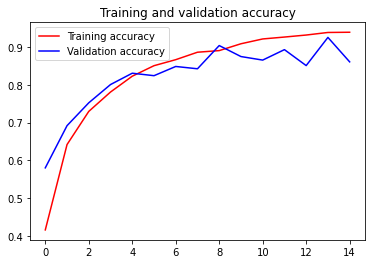

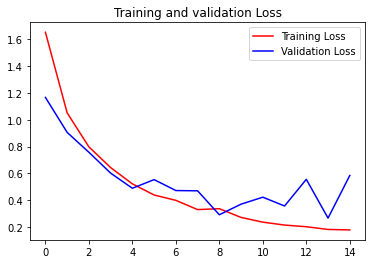

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

Saving 155873362_135852255084131_8131136003556710250_n-e1614670424602.jpg to 155873362_135852255084131_8131136003556710250_n-e1614670424602 (1).jpg


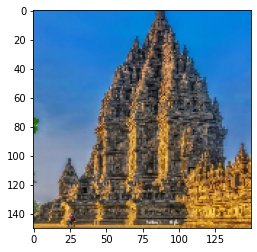

Benteng Fort Rotterdam: 0.00%
Candi Borobudur: 0.00%
Candi Ngetos: 0.00%
Candi Prambanan: 100.00%
Istana Maimun: 0.00%
Jam Gadang: 0.00%
Kota Tua: 0.00%
Lawang Sewu: 0.00%
Lembuswana: 0.00%
Monas: 0.00%


In [ ]:
from google.colab import files
from keras.preprocessing import image
import numpy as np

labels = train_generator.class_indices.keys()
uploaded = files.upload()

for paths in uploaded.keys():
 
  # predicting images
  path = paths
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 

  images = np.vstack([x])
  proba = model.predict(images)[0]
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))

In [ ]:
from shutil import copyfile

